### Imports and why we need it

In [1]:
# Imports
import requests
from io import BytesIO
from sklearn.datasets import load_svmlight_file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Code block to visualise raw data
diabetes_visual = pd.read_csv("diabetes.csv")
diabetes_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes_visual.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Visualis the data using scatter plots

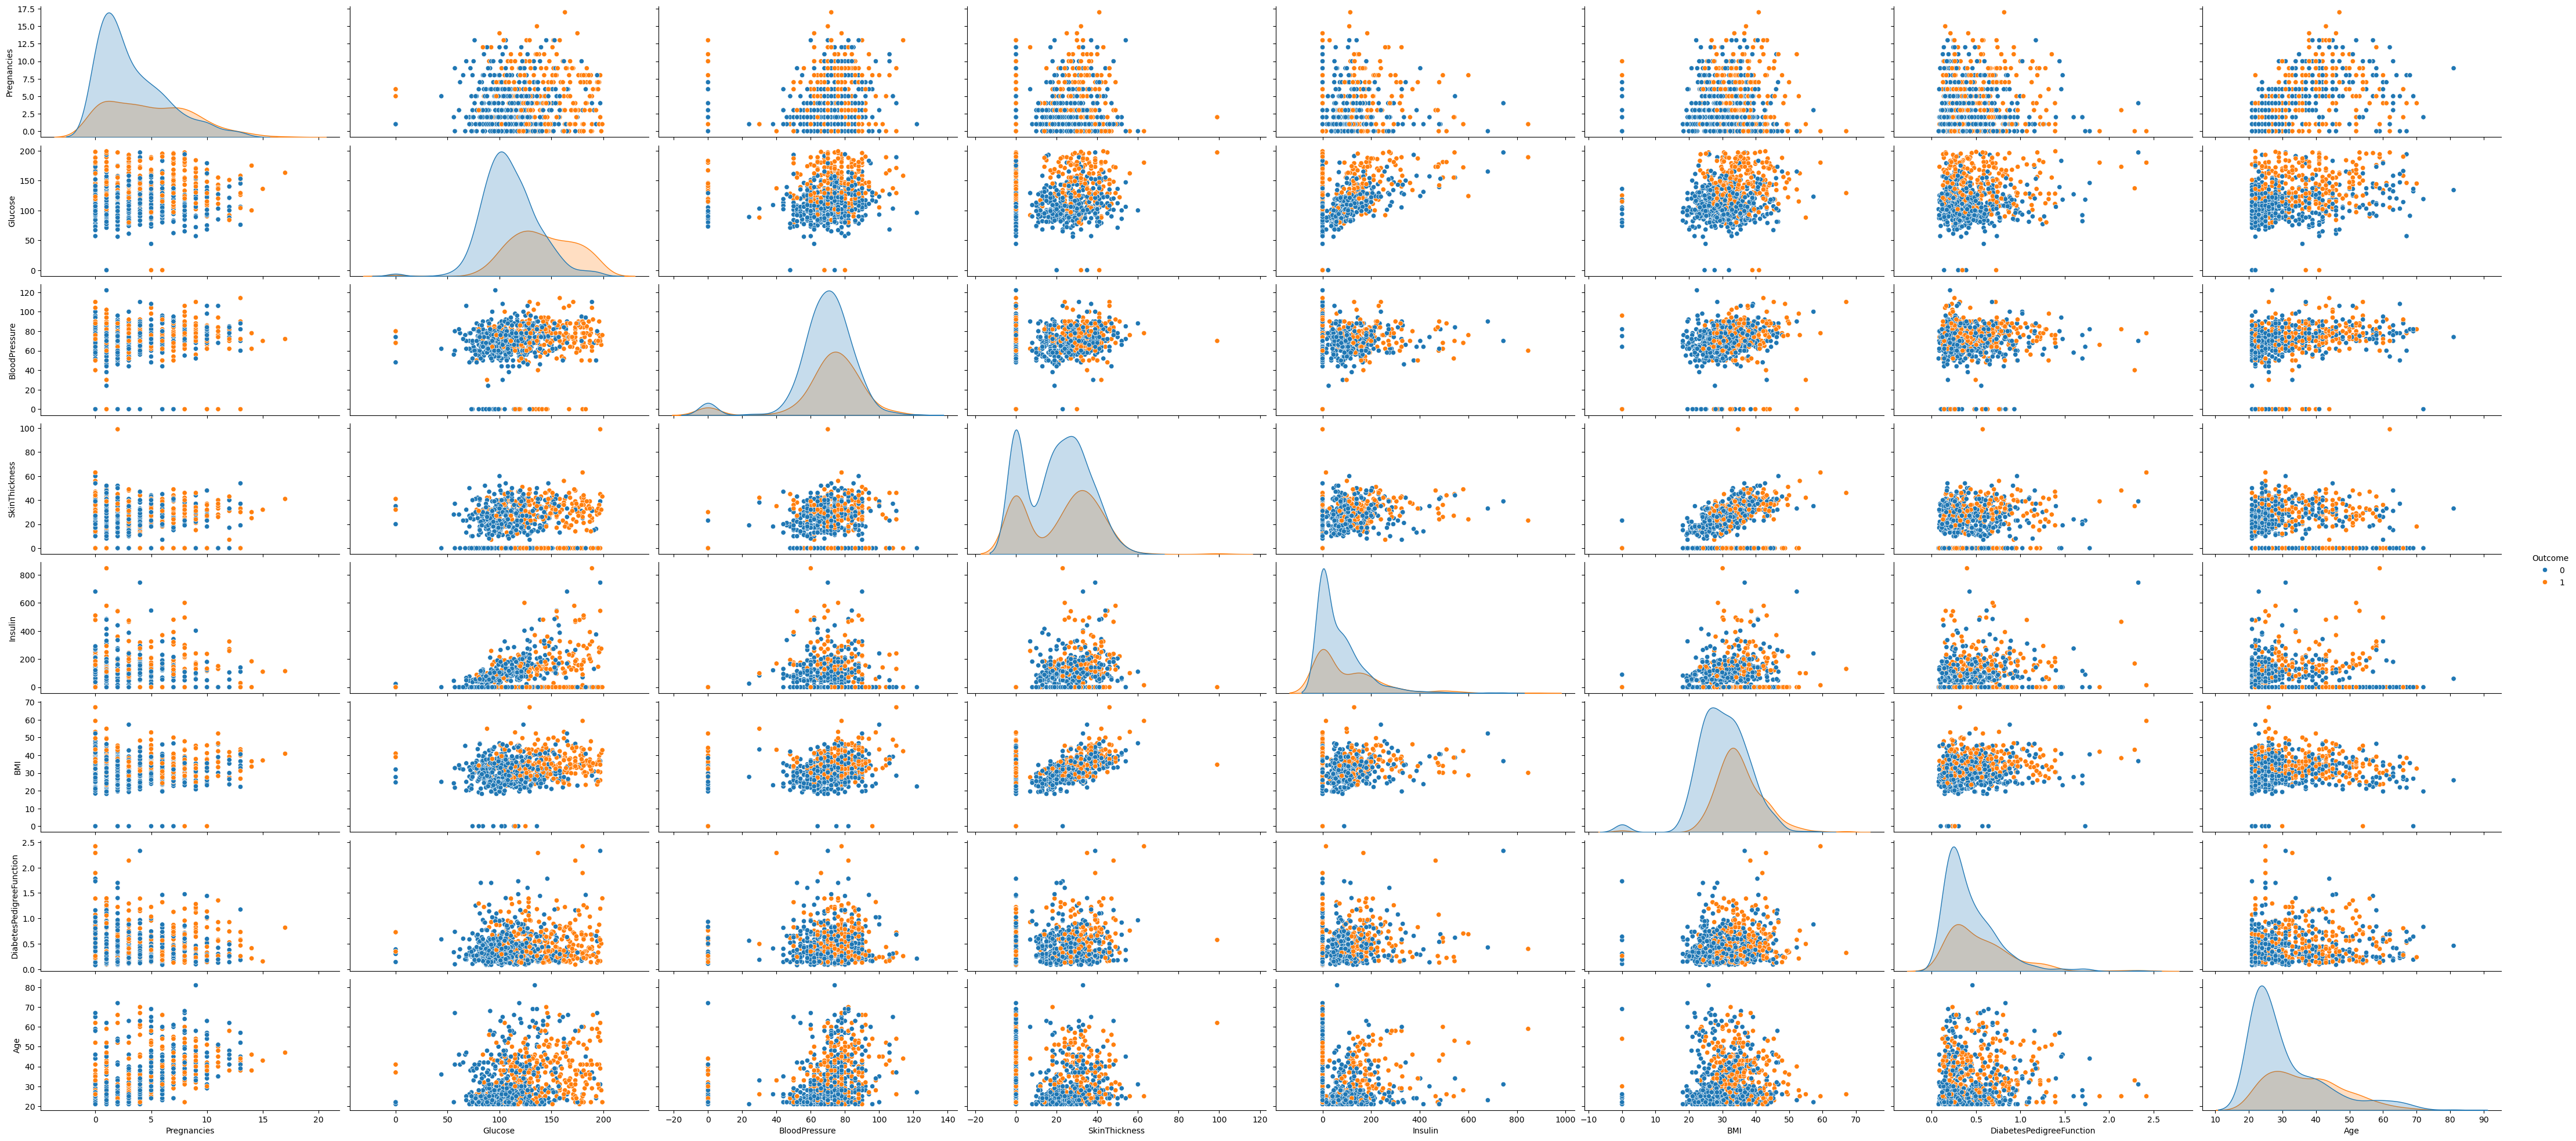

In [4]:
sns.pairplot(diabetes_visual, hue='Outcome', vars=diabetes_visual.columns[:-1],height=2.5, aspect=2.2)
plt.show()

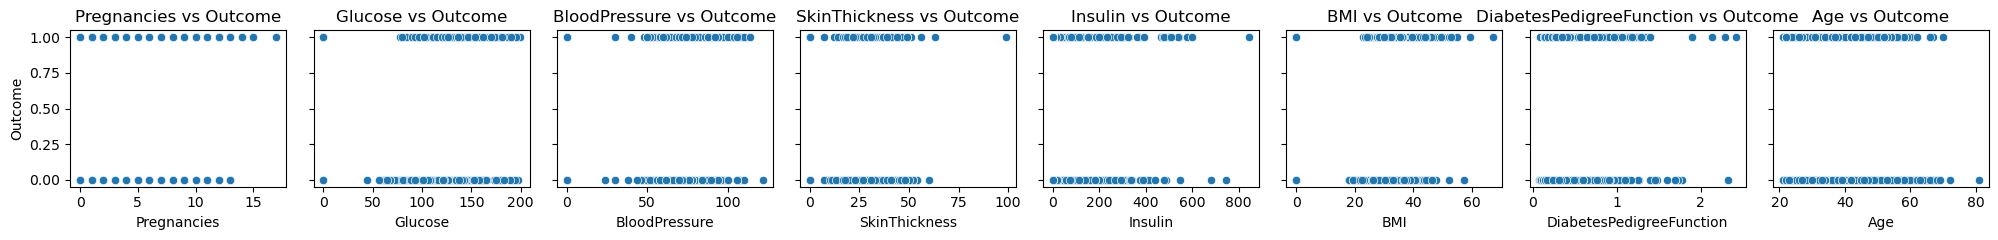

In [5]:
fig, axes = plt.subplots(1, len(diabetes_visual.columns) - 1, figsize=(20, 2.5), sharey=True)

# Loop through each feature and create a scatter plot vs Outcome
for i, feature in enumerate(diabetes_visual.columns[:-1]):
    sns.scatterplot(x=diabetes_visual[feature], y=diabetes_visual['Outcome'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Outcome')
    axes[i].set_xlabel(feature)

# Set common y label
axes[0].set_ylabel('Outcome')

plt.tight_layout()
plt.show()

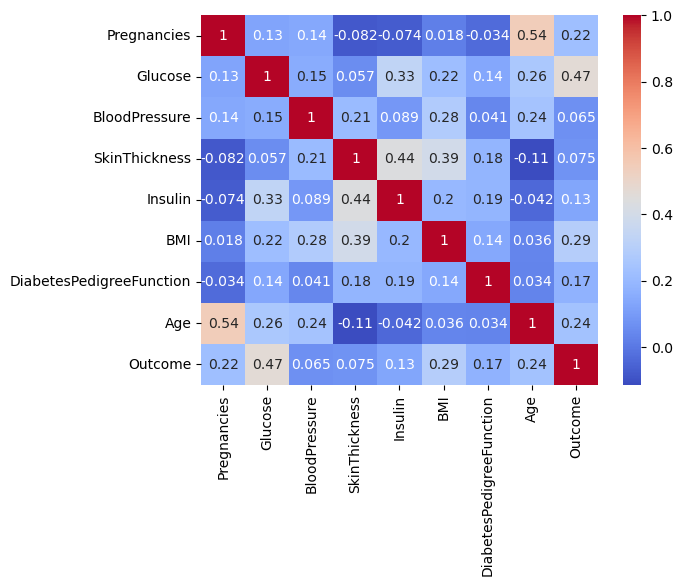

In [6]:
corr_matrix = diabetes_visual.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Attempt to data cleaning

In [7]:
diabetes_visual.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
(diabetes_visual == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
(diabetes_visual == 0).mean() * 100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [10]:
# Code to check for na value and print
url_data_from_website = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binar/diabetes"
local_file_data_from_website = "diabetes.txt"

try:
    # Attempt to fetch the data from the URL
    response_data_from_website = requests.get(url_data_from_website)
    response_data_from_website.raise_for_status()  # Raise an error if the request failed

    # Load data from the fetched content
    data_data_from_website = BytesIO(response_data_from_website.content)
    X_data_from_website, y_data_from_website = load_svmlight_file(data_data_from_website)
    print("Data loaded from URL.")

except (requests.exceptions.RequestException, IOError):
    # If the URL fetch fails, fall back to the local file
    if os.path.exists(local_file_data_from_website):
        with open(local_file_data_from_website, 'rb') as file:
            X_data_from_websitee, y_data_from_website = load_svmlight_file(file)
        print("Data loaded from local file.")
    else:
        raise FileNotFoundError(f"Both URL and local file '{local_file}' are unavailable.")

diabetes_data_from_website = pd.DataFrame(X_data_from_websitee.toarray())
diabetes_data_from_website['outcome'] = y_data_from_website

Data loaded from local file.


In [11]:
diabetes_data_from_website.head()

,0,1,2,3,4,5,6,7,outcome
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0,-1.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,1.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0,-1.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,1.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,-1.0


In [12]:
print("Are these column 0 (Pregnancies) value same :",(diabetes_visual.iloc[:, 0].values == diabetes_data_from_website.iloc[:, 0].values).all())
print("Are these column 1 (Glucose) value same :",(diabetes_visual.iloc[:, 1].values == diabetes_data_from_website.iloc[:, 1].values).all())
print("Are these column 2 (BloodPressure) value same :",(diabetes_visual.iloc[:, 2].values == diabetes_data_from_website.iloc[:, 2].values).all())
print("Are these column 3 (SkinThickness) value same :",(diabetes_visual.iloc[:, 3].values == diabetes_data_from_website.iloc[:, 3].values).all())
print("Are these column 4 (Insulin) value same :",(diabetes_visual.iloc[:, 4].values == diabetes_data_from_website.iloc[:, 4].values).all())
print("Are these column 5 (BMI) value same :",(diabetes_visual.iloc[:, 5].round(1).values == diabetes_data_from_website.iloc[:, 5].round(1).values).all())
print("Are these column 6 (DiabetesPedigreeFunction) value same :",(diabetes_visual.iloc[:, 6].values == diabetes_data_from_website.iloc[:, 6].values).all())
print("Are these column 7 (Age) value same :",(diabetes_visual.iloc[:, 7].values == diabetes_data_from_website.iloc[:, 7].values).all())

Are these column 0 (Pregnancies) value same : True
Are these column 1 (Glucose) value same : True
Are these column 2 (BloodPressure) value same : True
Are these column 3 (SkinThickness) value same : True
Are these column 4 (Insulin) value same : True
Are these column 5 (BMI) value same : True
Are these column 6 (DiabetesPedigreeFunction) value same : True
Are these column 7 (Age) value same : True


#### Since data are equal without any error value we can safely use the scaled data, in the later section we may see what happens if we use our won pre-processed data

In [13]:
url_scale = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binar/diabetes_scale"
local_file = "diabetes_scale.txt"

try:
    # Attempt to fetch the data from the URL
    response_scale = requests.get(url_scale)
    response_scale.raise_for_status()  # Raise an error if the request failed

    # Load data from the fetched content
    data_scale = BytesIO(response_scale.content)
    X_scale, y_scale = load_svmlight_file(data_scale)
    print("Data loaded from URL.")

except (requests.exceptions.RequestException, IOError):
    # If the URL fetch fails, fall back to the local file
    if os.path.exists(local_file):
        with open(local_file, 'rb') as file:
            X_scale, y_scale = load_svmlight_file(file)
        print("Data loaded from local file.")
    else:
        raise FileNotFoundError(f"Both URL and local file '{local_file}' are unavailable.")

# Create a DataFrame with the scaled data
diabetes_data__scale = pd.DataFrame(X_scale.toarray())
diabetes_data__scale['outcome'] = y_scale

Data loaded from local file.


In [14]:
y_scaled = diabetes_data__scale['outcome']
X_scaled = diabetes_data__scale.drop('outcome', axis=1)

In [15]:
X_scaled.head()

,0,1,2,3,4,5,6,7
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [16]:
y_scaled.head()

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
Name: outcome, dtype: float64

### After decision is made to what to do with the data split the data

In [17]:
# Convert to numpy
X_scaled_numpy = X_scaled.to_numpy()
y_scaled_numpy = y_scaled.to_numpy()

In [18]:
# Split the data into
# Test Train Split
from sklearn.model_selection import train_test_split

X_big_train, X_test, y_big_train, y_test = train_test_split(
    X_scaled_numpy, y_scaled_numpy, test_size=0.2, random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_big_train, y_big_train, test_size=0.2, random_state=42
)

In [19]:
print("X_train shape:", X_train.shape)  # Training features
print("X_val shape:", X_val.shape)  # Validation features
print("X_test shape:", X_test.shape)              # Test features
print("y_train shape:", y_train.shape)    # Training targets
print("y_val shape:", y_val.shape)    # Training targets
print("y_test shape:", y_test.shape)               # Test targets

X_train shape: (491, 8)
X_val shape: (123, 8)
X_test shape: (154, 8)
y_train shape: (491,)
y_val shape: (123,)
y_test shape: (154,)


In [20]:
import torch

In [21]:
# Conversion to Tensors

# Training Set
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Validation Set
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Test Set
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [22]:
X_train_tensor[:4]

tensor([[-0.6471,  0.2864,  0.2787, -1.0000, -1.0000, -0.3711, -0.8377,  0.1333],
        [-0.5294, -0.0452, -0.0164, -0.3535, -1.0000,  0.0551, -0.8241, -0.7667],
        [-0.8824,  0.6382,  0.1803, -1.0000, -1.0000,  0.1624, -0.0231, -0.6000],
        [-0.8824,  0.4372,  0.4098, -0.3939, -0.2199, -0.1028, -0.3049, -0.9333]])

### Define the Perceptron

In [23]:
import torch.nn as nn

In [24]:
class Perceptron_Sign_Without_Bias(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron_Sign_Without_Bias, self).__init__()
        self.fc = nn.Linear(input_dim, 1, bias=False)
    
    def forward(self, x):
        return torch.sign(self.fc(x))

In [25]:
class Perceptron_Sign_With_Bias(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron_Sign_With_Bias, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sign(self.fc(x))

In [26]:
import random

In [27]:
def set_seed(seed):
    # Set the random seed for Python's random module
    random.seed(seed)
    
    # Set the seed for NumPy
    #np.random.seed(seed)
    
    # Set the seed for PyTorch
    torch.manual_seed(seed)
    
    # If using CUDA, set the seed for CUDA as well
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # For multi-GPU setups

    # Set the deterministic flag for reproducibility (may impact performance)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [28]:
def train_perceptron(model, data, labels, val_data, val_labels, epochs, learning_rate):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        total_updates = 0
        correct_predictions = 0  # Initialize correct predictions counter
        
        for i in range(len(data)):
            optimizer.zero_grad()
            
            output = model(data[i])
            predicted_label = output.item()  # Get the predicted output
            
            # Check if the prediction is correct
            if labels[i] * predicted_label <= 0:  # Misclassified
                total_updates += 1
                if labels[i] == 1:
                    # Adjust weights for positive misclassification
                    model.fc.weight.data += learning_rate * data[i]
                else:
                    # Adjust weights for negative misclassification
                    model.fc.weight.data -= learning_rate * data[i]
            else:
                correct_predictions += 1  # Increment correct predictions
            
        # Calculate training accuracy for the epoch
        train_accuracy = correct_predictions / len(data) * 100  # Convert to percentage
        
        # Calculate validation accuracy
        val_correct_predictions = 0
        with torch.no_grad():  
            for j in range(len(val_data)):
                val_output = model(val_data[j])
                if val_labels[j] * val_output.item() > 0:  # Correctly classified
                    val_correct_predictions += 1
        
        val_accuracy = val_correct_predictions / len(val_data) * 100  # Convert to percentage
        
        print(f'Epoch {epoch + 1}/{epochs}, '
              f'Training Accuracy: {train_accuracy:.2f}%, '
              f'Validation Accuracy: {val_accuracy:.2f}%')
        
        # Check convergence
        if total_updates == 0:
            print(f'Converged after {epoch + 1} epochs.')
            break


In [29]:
seed = 42
set_seed(seed)
model = Perceptron_Sign_Without_Bias(input_dim=8)
train_perceptron(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=10, learning_rate=0.1)
from sklearn.metrics import accuracy_score, classification_report
with torch.no_grad():
    predictions_sign_without_bias_lr_0_1 = model(X_test_tensor)

accuracy = accuracy_score(y_test_tensor.numpy(), predictions_sign_without_bias_lr_0_1.numpy())
print(f'Test Accuracy Perceptron Sign Without Bias LR 0.1: {accuracy:.3f}')

Epoch 1/10, Training Accuracy: 66.40%, Validation Accuracy: 71.54%
Epoch 2/10, Training Accuracy: 69.65%, Validation Accuracy: 73.98%
Epoch 3/10, Training Accuracy: 68.02%, Validation Accuracy: 74.80%
Epoch 4/10, Training Accuracy: 67.62%, Validation Accuracy: 73.17%
Epoch 5/10, Training Accuracy: 70.67%, Validation Accuracy: 74.80%
Epoch 6/10, Training Accuracy: 67.41%, Validation Accuracy: 70.73%
Epoch 7/10, Training Accuracy: 69.25%, Validation Accuracy: 73.98%
Epoch 8/10, Training Accuracy: 68.64%, Validation Accuracy: 73.98%
Epoch 9/10, Training Accuracy: 68.23%, Validation Accuracy: 73.17%
Epoch 10/10, Training Accuracy: 68.84%, Validation Accuracy: 73.98%
Test Accuracy Perceptron Sign Without Bias LR 0.1: 0.727


In [30]:
del model

In [31]:
seed = 42
set_seed(seed)
model = Perceptron_Sign_With_Bias(input_dim=8)
train_perceptron(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=10, learning_rate=0.1)
from sklearn.metrics import accuracy_score, classification_report
with torch.no_grad():
    predictions_sign_with_bias_lr_0_1 = model(X_test_tensor)

accuracy = accuracy_score(y_test_tensor.numpy(), predictions_sign_with_bias_lr_0_1.numpy())
print(f'Test Accuracy Perceptron Sign With Bias LR 0.1: {accuracy:.3f}')

Epoch 1/10, Training Accuracy: 63.95%, Validation Accuracy: 77.24%
Epoch 2/10, Training Accuracy: 68.84%, Validation Accuracy: 73.98%
Epoch 3/10, Training Accuracy: 69.25%, Validation Accuracy: 78.86%
Epoch 4/10, Training Accuracy: 68.84%, Validation Accuracy: 79.67%
Epoch 5/10, Training Accuracy: 68.84%, Validation Accuracy: 75.61%
Epoch 6/10, Training Accuracy: 68.84%, Validation Accuracy: 80.49%
Epoch 7/10, Training Accuracy: 70.06%, Validation Accuracy: 78.86%
Epoch 8/10, Training Accuracy: 69.86%, Validation Accuracy: 73.98%
Epoch 9/10, Training Accuracy: 68.84%, Validation Accuracy: 78.86%
Epoch 10/10, Training Accuracy: 70.06%, Validation Accuracy: 73.98%
Test Accuracy Perceptron Sign With Bias LR 0.1: 0.701


In [32]:
del model

In [33]:
seed = 42
set_seed(seed)
model = Perceptron_Sign_Without_Bias(input_dim=8)
train_perceptron(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=10, learning_rate=0.01)
from sklearn.metrics import accuracy_score, classification_report
with torch.no_grad():
    predictions_sign_without_bias_lr_0_0_1 = model(X_test_tensor)

accuracy = accuracy_score(y_test_tensor.numpy(), predictions_sign_without_bias_lr_0_0_1.numpy())
print(f'Test Accuracy Perceptron Sign Without Bias LR 0.01: {accuracy:.3f}')

Epoch 1/10, Training Accuracy: 56.21%, Validation Accuracy: 72.36%
Epoch 2/10, Training Accuracy: 69.04%, Validation Accuracy: 66.67%
Epoch 3/10, Training Accuracy: 70.47%, Validation Accuracy: 73.98%
Epoch 4/10, Training Accuracy: 66.80%, Validation Accuracy: 74.80%
Epoch 5/10, Training Accuracy: 67.62%, Validation Accuracy: 72.36%
Epoch 6/10, Training Accuracy: 69.04%, Validation Accuracy: 73.98%
Epoch 7/10, Training Accuracy: 68.02%, Validation Accuracy: 75.61%
Epoch 8/10, Training Accuracy: 69.04%, Validation Accuracy: 73.17%
Epoch 9/10, Training Accuracy: 69.04%, Validation Accuracy: 75.61%
Epoch 10/10, Training Accuracy: 68.02%, Validation Accuracy: 73.98%
Test Accuracy Perceptron Sign Without Bias LR 0.01: 0.701


In [34]:
del model

In [35]:
seed = 42
set_seed(seed)
model = Perceptron_Sign_With_Bias(input_dim=8)
train_perceptron(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=10, learning_rate=0.01)
from sklearn.metrics import accuracy_score, classification_report
with torch.no_grad():
    predictions_sign_with_bias_lr_0_0_1 = model(X_test_tensor)

accuracy = accuracy_score(y_test_tensor.numpy(), predictions_sign_with_bias_lr_0_0_1.numpy())
print(f'Test Accuracy Perceptron Sign With Bias  LR 0.01: {accuracy:.3f}')

Epoch 1/10, Training Accuracy: 54.38%, Validation Accuracy: 66.67%
Epoch 2/10, Training Accuracy: 64.97%, Validation Accuracy: 74.80%
Epoch 3/10, Training Accuracy: 67.01%, Validation Accuracy: 76.42%
Epoch 4/10, Training Accuracy: 69.04%, Validation Accuracy: 76.42%
Epoch 5/10, Training Accuracy: 68.43%, Validation Accuracy: 77.24%
Epoch 6/10, Training Accuracy: 69.65%, Validation Accuracy: 77.24%
Epoch 7/10, Training Accuracy: 68.84%, Validation Accuracy: 77.24%
Epoch 8/10, Training Accuracy: 68.84%, Validation Accuracy: 76.42%
Epoch 9/10, Training Accuracy: 68.43%, Validation Accuracy: 76.42%
Epoch 10/10, Training Accuracy: 68.43%, Validation Accuracy: 77.24%
Test Accuracy Perceptron Sign With Bias  LR 0.01: 0.669


In [36]:
del model

In [37]:
from sklearn.linear_model import Perceptron
perceptron_sklearn = Perceptron(random_state=42, validation_fraction=0.2, early_stopping=True)
perceptron_sklearn.fit(X_big_train, (y_big_train+1)/2)
accuracy = perceptron_sklearn.score(X_test, (y_test+1)/2)
print(f'Test Accuracy Sklearn Perceptron: {accuracy:.3f}')

Test Accuracy Sklearn Perceptron: 0.656


### Expreimentation with the perceptron
- Sign activation function with bias
- Try a different activation function (Sigmoid) and notice the perfromance
- Try different learning rates on both the signmoid and sign activated
- Select the best (which is obviously the sigmoid)
- try backpropagatiob on each on the best

In [38]:
# Try different activation function
class Perceptron_Sigmoid(nn.Module):
    def __init__(self, input_size):
        super(Perceptron_Sigmoid, self).__init__()
        self.fc = nn.Linear(input_size, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))


def calculate_accuracy(predictions, labels):
    correct = (predictions == labels).float()
    accuracy = correct.sum() / len(labels)
    return accuracy

def training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer):
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * batch_X.size(0)
    
        epoch_loss = running_loss / len(train_dataset)
    
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_predictions = (val_outputs > 0.5).float()
            val_accuracy = calculate_accuracy(val_predictions, y_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor).item()
            
        print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {epoch_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Accuracy: {val_accuracy:.4f}')

In [39]:
y_train_tensor = (y_train_tensor+1)/2
y_val_tensor = (y_val_tensor+1)/2
y_test_tensor = (y_test_tensor+1)/2

In [40]:
# Model, loss function, and optimizer
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Common
input_size = 8
seed = 42
criterion = nn.BCELoss()
batch_size = 16
num_epochs = 10
# Creating data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [41]:
# Perceptron Sigmoid With Bias SGD Optim LR 0.1
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_sgd_lr_0_1 = optim.SGD(model.parameters(), lr=0.1)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_sgd_lr_0_1)
with torch.no_grad():
    outputs_sgd_lr_0_1 = model(X_test_tensor)
    predicted_labels_sgd_lr_0_1 = (outputs_sgd_lr_0_1 >= 0.5).float()

accuracy_sgd_lr_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias SGD Optim LR 0.1: {accuracy_sgd_lr_0_1:.3f}')

Epoch [1/10], Train Loss: 0.6758, Val Loss: 0.6351, Val Accuracy: 0.6585
Epoch [2/10], Train Loss: 0.6335, Val Loss: 0.6114, Val Accuracy: 0.6585
Epoch [3/10], Train Loss: 0.6086, Val Loss: 0.5952, Val Accuracy: 0.6585
Epoch [4/10], Train Loss: 0.5923, Val Loss: 0.5768, Val Accuracy: 0.6911
Epoch [5/10], Train Loss: 0.5772, Val Loss: 0.5640, Val Accuracy: 0.6992
Epoch [6/10], Train Loss: 0.5638, Val Loss: 0.5539, Val Accuracy: 0.6911
Epoch [7/10], Train Loss: 0.5555, Val Loss: 0.5451, Val Accuracy: 0.7154
Epoch [8/10], Train Loss: 0.5472, Val Loss: 0.5388, Val Accuracy: 0.7154
Epoch [9/10], Train Loss: 0.5406, Val Loss: 0.5294, Val Accuracy: 0.7236
Epoch [10/10], Train Loss: 0.5338, Val Loss: 0.5236, Val Accuracy: 0.7236

 Test Accuracy Perceptron Sigmoid With Bias SGD Optim LR 0.1: 0.740


In [42]:
del model

In [43]:
# Perceptron Sigmoid With Bias SGD Optim LR 0.01
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_sgd_lr_0_0_1 = optim.SGD(model.parameters(), lr=0.01)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_sgd_lr_0_0_1)
with torch.no_grad():
    outputs_sgd_lr_0_0_1 = model(X_test_tensor)
    predicted_labels_sgd_lr_0_0_1 = (outputs_sgd_lr_0_0_1 >= 0.5).float()

accuracy_sgd_lr_0_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias SGD Optim LR 0.01: {accuracy_sgd_lr_0_0_1:.3f}')

Epoch [1/10], Train Loss: 0.7204, Val Loss: 0.6931, Val Accuracy: 0.5691
Epoch [2/10], Train Loss: 0.6998, Val Loss: 0.6773, Val Accuracy: 0.6504
Epoch [3/10], Train Loss: 0.6861, Val Loss: 0.6670, Val Accuracy: 0.6585
Epoch [4/10], Train Loss: 0.6766, Val Loss: 0.6592, Val Accuracy: 0.6585
Epoch [5/10], Train Loss: 0.6694, Val Loss: 0.6534, Val Accuracy: 0.6585
Epoch [6/10], Train Loss: 0.6634, Val Loss: 0.6486, Val Accuracy: 0.6585
Epoch [7/10], Train Loss: 0.6587, Val Loss: 0.6446, Val Accuracy: 0.6585
Epoch [8/10], Train Loss: 0.6545, Val Loss: 0.6411, Val Accuracy: 0.6585
Epoch [9/10], Train Loss: 0.6507, Val Loss: 0.6380, Val Accuracy: 0.6585
Epoch [10/10], Train Loss: 0.6472, Val Loss: 0.6352, Val Accuracy: 0.6585

 Test Accuracy Perceptron Sigmoid With Bias SGD Optim LR 0.01: 0.643


In [44]:
del model

In [45]:
# Perceptron Sigmoid With Bias Adam Optim LR 0.1
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_adam_lr_0_1 = optim.Adam(model.parameters(), lr=0.1)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_adam_lr_0_1)
with torch.no_grad():
    outputs_adam_lr_0_1 = model(X_test_tensor)
    predicted_labels_adam_lr_0_1 = (outputs_adam_lr_0_1 >= 0.5).float()

accuracy_adam_lr_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_adam_lr_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias Adam Optim LR 0.1: {accuracy_adam_lr_0_1:.3f}')

Epoch [1/10], Train Loss: 0.5858, Val Loss: 0.4905, Val Accuracy: 0.7561
Epoch [2/10], Train Loss: 0.5096, Val Loss: 0.4643, Val Accuracy: 0.7886
Epoch [3/10], Train Loss: 0.4949, Val Loss: 0.4960, Val Accuracy: 0.7642
Epoch [4/10], Train Loss: 0.5108, Val Loss: 0.4523, Val Accuracy: 0.7805
Epoch [5/10], Train Loss: 0.4830, Val Loss: 0.4555, Val Accuracy: 0.7805
Epoch [6/10], Train Loss: 0.4801, Val Loss: 0.4597, Val Accuracy: 0.7805
Epoch [7/10], Train Loss: 0.4779, Val Loss: 0.4748, Val Accuracy: 0.7561
Epoch [8/10], Train Loss: 0.4797, Val Loss: 0.4759, Val Accuracy: 0.7642
Epoch [9/10], Train Loss: 0.5034, Val Loss: 0.4896, Val Accuracy: 0.7480
Epoch [10/10], Train Loss: 0.4848, Val Loss: 0.4626, Val Accuracy: 0.7805

 Test Accuracy Perceptron Sigmoid With Bias Adam Optim LR 0.1: 0.714


In [46]:
del model

In [47]:
# Perceptron Sigmoid With Bias Adam Optim LR 0.01
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_adam_lr_0_0_1 = optim.Adam(model.parameters(), lr=0.01)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_adam_lr_0_0_1)
with torch.no_grad():
    outputs_adam_lr_0_0_1 = model(X_test_tensor)
    predicted_labels_adam_lr_0_0_1 = (outputs_adam_lr_0_0_1 >= 0.5).float()

accuracy_adam_lr_0_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_adam_lr_0_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias Adam Optim LR 0.01: {accuracy_adam_lr_0_0_1:.3f}')

Epoch [1/10], Train Loss: 0.6771, Val Loss: 0.6286, Val Accuracy: 0.6585
Epoch [2/10], Train Loss: 0.6271, Val Loss: 0.5996, Val Accuracy: 0.6585
Epoch [3/10], Train Loss: 0.6006, Val Loss: 0.5741, Val Accuracy: 0.6748
Epoch [4/10], Train Loss: 0.5765, Val Loss: 0.5530, Val Accuracy: 0.6911
Epoch [5/10], Train Loss: 0.5568, Val Loss: 0.5367, Val Accuracy: 0.7073
Epoch [6/10], Train Loss: 0.5435, Val Loss: 0.5236, Val Accuracy: 0.7317
Epoch [7/10], Train Loss: 0.5323, Val Loss: 0.5142, Val Accuracy: 0.7480
Epoch [8/10], Train Loss: 0.5246, Val Loss: 0.5041, Val Accuracy: 0.7561
Epoch [9/10], Train Loss: 0.5172, Val Loss: 0.4990, Val Accuracy: 0.7561
Epoch [10/10], Train Loss: 0.5106, Val Loss: 0.4910, Val Accuracy: 0.7642

 Test Accuracy Perceptron Sigmoid With Bias Adam Optim LR 0.01: 0.747


In [48]:
del model

In [49]:
# Perceptron Sigmoid With Bias RMSprop Optim LR 0.1
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_rmsprop_lr_0_1 = optim.RMSprop(model.parameters(), lr=0.1)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_rmsprop_lr_0_1)
with torch.no_grad():
    outputs_rmsprop_lr_0_1 = model(X_test_tensor)
    predicted_labels_rmsprop_lr_0_1 = (outputs_rmsprop_lr_0_1 >= 0.5).float()

accuracy_rmsprop_lr_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias RMSProp Optim LR 0.1: {accuracy_rmsprop_lr_0_1:.3f}')

Epoch [1/10], Train Loss: 0.5975, Val Loss: 0.4997, Val Accuracy: 0.7724
Epoch [2/10], Train Loss: 0.4988, Val Loss: 0.4595, Val Accuracy: 0.7724
Epoch [3/10], Train Loss: 0.4925, Val Loss: 0.5261, Val Accuracy: 0.7398
Epoch [4/10], Train Loss: 0.5029, Val Loss: 0.4555, Val Accuracy: 0.7561
Epoch [5/10], Train Loss: 0.4975, Val Loss: 0.4661, Val Accuracy: 0.7561
Epoch [6/10], Train Loss: 0.4879, Val Loss: 0.4734, Val Accuracy: 0.7480
Epoch [7/10], Train Loss: 0.4914, Val Loss: 0.5052, Val Accuracy: 0.7480
Epoch [8/10], Train Loss: 0.4888, Val Loss: 0.5462, Val Accuracy: 0.7317
Epoch [9/10], Train Loss: 0.4880, Val Loss: 0.4727, Val Accuracy: 0.7561
Epoch [10/10], Train Loss: 0.4922, Val Loss: 0.4694, Val Accuracy: 0.7561

 Test Accuracy Perceptron Sigmoid With Bias RMSProp Optim LR 0.1: 0.766


In [50]:
del model

In [51]:
# Perceptron Sigmoid With Bias RMSprop Optim LR 0.01
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_rmsprop_lr_0_0_1 = optim.RMSprop(model.parameters(), lr=0.01)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_rmsprop_lr_0_0_1)
with torch.no_grad():
    outputs_rmsprop_lr_0_0_1 = model(X_test_tensor)
    predicted_labels_rmsprop_lr_0_0_1 = (outputs_rmsprop_lr_0_0_1 >= 0.5).float()

accuracy_rmsprop_lr_0_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias RMSProp Optim LR 0.01: {accuracy_rmsprop_lr_0_0_1:.3f}')

Epoch [1/10], Train Loss: 0.6304, Val Loss: 0.5808, Val Accuracy: 0.6585
Epoch [2/10], Train Loss: 0.5736, Val Loss: 0.5486, Val Accuracy: 0.6992
Epoch [3/10], Train Loss: 0.5479, Val Loss: 0.5295, Val Accuracy: 0.7642
Epoch [4/10], Train Loss: 0.5349, Val Loss: 0.5136, Val Accuracy: 0.7561
Epoch [5/10], Train Loss: 0.5239, Val Loss: 0.5032, Val Accuracy: 0.7561
Epoch [6/10], Train Loss: 0.5146, Val Loss: 0.4971, Val Accuracy: 0.7561
Epoch [7/10], Train Loss: 0.5095, Val Loss: 0.4908, Val Accuracy: 0.7642
Epoch [8/10], Train Loss: 0.5041, Val Loss: 0.4877, Val Accuracy: 0.7642
Epoch [9/10], Train Loss: 0.5001, Val Loss: 0.4782, Val Accuracy: 0.7886
Epoch [10/10], Train Loss: 0.4959, Val Loss: 0.4754, Val Accuracy: 0.7886

 Test Accuracy Perceptron Sigmoid With Bias RMSProp Optim LR 0.01: 0.773


In [52]:
del model

In [53]:
# Perceptron Sigmoid With Bias NAdam Optim LR 0.1
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_nadam_lr_0_1 = optim.NAdam(model.parameters(), lr=0.1)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_nadam_lr_0_1)
with torch.no_grad():
    outputs_nadam_lr_0_1 = model(X_test_tensor)
    predicted_labels_nadam_lr_0_1 = (outputs_nadam_lr_0_1 >= 0.5).float()

accuracy_nadam_lr_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias Ndam Optim LR 0.1: {accuracy_nadam_lr_0_1:.3f}')

Epoch [1/10], Train Loss: 0.6049, Val Loss: 0.5050, Val Accuracy: 0.7561
Epoch [2/10], Train Loss: 0.5074, Val Loss: 0.4628, Val Accuracy: 0.7805
Epoch [3/10], Train Loss: 0.4847, Val Loss: 0.4936, Val Accuracy: 0.7724
Epoch [4/10], Train Loss: 0.4916, Val Loss: 0.4529, Val Accuracy: 0.7724
Epoch [5/10], Train Loss: 0.4871, Val Loss: 0.4548, Val Accuracy: 0.7642
Epoch [6/10], Train Loss: 0.4811, Val Loss: 0.4677, Val Accuracy: 0.7561
Epoch [7/10], Train Loss: 0.4844, Val Loss: 0.4808, Val Accuracy: 0.7480
Epoch [8/10], Train Loss: 0.4821, Val Loss: 0.5209, Val Accuracy: 0.7398
Epoch [9/10], Train Loss: 0.4842, Val Loss: 0.4662, Val Accuracy: 0.7805
Epoch [10/10], Train Loss: 0.4835, Val Loss: 0.4659, Val Accuracy: 0.7805

 Test Accuracy Perceptron Sigmoid With Bias Ndam Optim LR 0.1: 0.727


In [54]:
del model

In [55]:
# Perceptron Sigmoid With Bias NAdam Optim LR 0.01
set_seed(seed)
model = Perceptron_Sigmoid(input_size)
optimizer_nadam_lr_0_0_1 = optim.NAdam(model.parameters(), lr=0.01)
training_validation(model, X_train_tensor, y_train_tensor, X_val_tensor, 
                        y_val_tensor, batch_size, num_epochs, criterion, optimizer_nadam_lr_0_0_1)
with torch.no_grad():
    outputs_nadam_lr_0_0_1 = model(X_test_tensor)
    predicted_labels_nadam_lr_0_0_1 = (outputs_nadam_lr_0_0_1 >= 0.5).float()

accuracy_nadam_lr_0_0_1 = accuracy_score(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_0_1.numpy())
print(f'\n Test Accuracy Perceptron Sigmoid With Bias Ndam Optim LR 0.1: {accuracy_nadam_lr_0_0_1:.3f}')

Epoch [1/10], Train Loss: 0.6841, Val Loss: 0.6350, Val Accuracy: 0.6585
Epoch [2/10], Train Loss: 0.6323, Val Loss: 0.6026, Val Accuracy: 0.6585
Epoch [3/10], Train Loss: 0.6030, Val Loss: 0.5762, Val Accuracy: 0.6748
Epoch [4/10], Train Loss: 0.5799, Val Loss: 0.5558, Val Accuracy: 0.6911
Epoch [5/10], Train Loss: 0.5609, Val Loss: 0.5393, Val Accuracy: 0.7073
Epoch [6/10], Train Loss: 0.5463, Val Loss: 0.5270, Val Accuracy: 0.7236
Epoch [7/10], Train Loss: 0.5357, Val Loss: 0.5168, Val Accuracy: 0.7480
Epoch [8/10], Train Loss: 0.5270, Val Loss: 0.5078, Val Accuracy: 0.7480
Epoch [9/10], Train Loss: 0.5195, Val Loss: 0.4996, Val Accuracy: 0.7561
Epoch [10/10], Train Loss: 0.5125, Val Loss: 0.4930, Val Accuracy: 0.7642

 Test Accuracy Perceptron Sigmoid With Bias Ndam Optim LR 0.1: 0.753


In [56]:
del model

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, learning_rate_init=0.01,validation_fraction=0.2, early_stopping=True)
mlp.fit(X_big_train, (y_big_train.ravel()+1)/2)

# Training accuracy
train_accuracy = accuracy_score(y_train_tensor.numpy(), mlp.predict(X_train_tensor.numpy()))

# Testing accuracy
test_accuracy = accuracy_score(y_test_tensor.numpy(), mlp.predict(X_test_tensor.numpy()))

print(f'MLP Training Accuracy: {train_accuracy:.3f}')
print(f'MLP Testing Accuracy: {test_accuracy:.3f}')


MLP Training Accuracy: 0.780
MLP Testing Accuracy: 0.753


In [58]:
# MLP (300-100)
mlp_300_100 = MLPClassifier(hidden_layer_sizes=(300, 100), random_state=42,learning_rate_init=0.01, validation_fraction=0.2, early_stopping=True)
mlp_300_100.fit(X_big_train, (y_big_train.ravel()+1)/2)

# Training accuracy
train_accuracy_300_100 = accuracy_score(y_train_tensor.numpy(), mlp_300_100.predict(X_train_tensor.numpy()))

# Testing accuracy
test_accuracy_300_100 = accuracy_score(y_test_tensor.numpy(), mlp_300_100.predict(X_test_tensor.numpy()))

print(f'MLP 300 100 Training Accuracy: {train_accuracy_300_100:.3f}')
print(f'MLP 300 100 Testing Accuracy: {test_accuracy_300_100:.3f}')


MLP 300 100 Training Accuracy: 0.770
MLP 300 100 Testing Accuracy: 0.714


In [59]:
from sklearn.svm import SVC

# SVM
svm_model = SVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_tensor.numpy(), y_train_tensor.numpy().ravel())

# Training accuracy
train_accuracy_svm = accuracy_score(y_train_tensor.numpy(), svm_model.predict(X_train_tensor.numpy()))

# Validation accuracy
val_accuracy_svm = accuracy_score(y_val_tensor.numpy(), svm_model.predict(X_val_tensor.numpy()))

# Testing accuracy
test_accuracy_svm = accuracy_score(y_test_tensor.numpy(), svm_model.predict(X_test_tensor.numpy()))

print(f'SVM Training Accuracy: {train_accuracy_svm:.3f}')
print(f'SVM Validation Accuracy: {val_accuracy_svm:.3f}')
print(f'SVM Testing Accuracy: {test_accuracy_svm:.3f}')


SVM Training Accuracy: 0.794
SVM Validation Accuracy: 0.732
SVM Testing Accuracy: 0.747


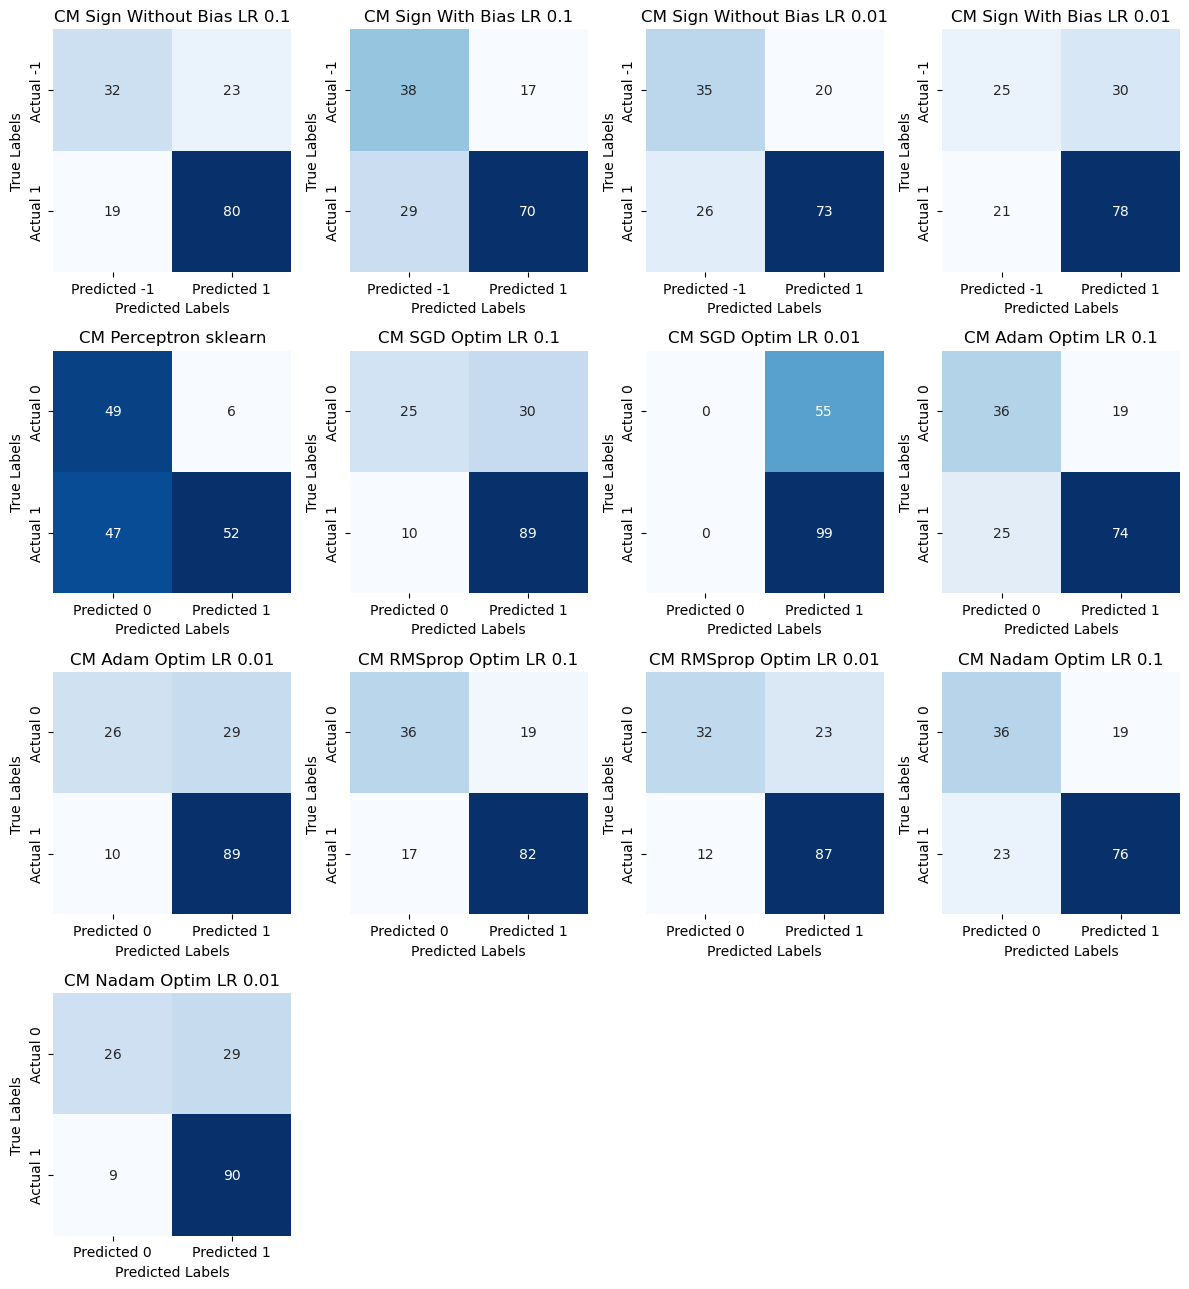

In [60]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_1 = confusion_matrix(y_test, predictions_sign_without_bias_lr_0_1) # Perceptron Sign Without Bias LR 0.1
cm_2 = confusion_matrix(y_test, predictions_sign_with_bias_lr_0_1) # Perceptron Sign With Bias LR 0.1
cm_3 = confusion_matrix(y_test, predictions_sign_without_bias_lr_0_0_1) # Perceptron Sign Without Bias LR 0.01
cm_4 = confusion_matrix(y_test, predictions_sign_with_bias_lr_0_0_1) # Perceptron Sign With Bias LR 0.01
cm_5 = confusion_matrix((y_test+1)/2, perceptron_sklearn.predict(X_test)) # Perceptron sklearn
cm_6 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_1.numpy())  # SGD Optim LR 0.1
cm_7 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_0_1.numpy())  # SGD Optim LR 0.01
cm_8 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_adam_lr_0_1.numpy())  # Adam Optim LR 0.1
cm_9 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_adam_lr_0_0_1.numpy())  # Adam Optim LR 0.01
cm_10 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_1.numpy())  # RMSprop Optim LR 0.1
cm_11 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_0_1.numpy())  # RMSprop Optim LR 0.01
cm_12 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_1.numpy())  # Nadam Optim LR 0.1
cm_13 = confusion_matrix(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_0_1.numpy())  # Nadam Optim LR 0.01

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(4, 4, figsize=(12, 13))  # Adjust size as needed

# List of confusion matrices and titles
cms = [cm_1, cm_2, cm_3, cm_4, cm_5, cm_6, cm_7, cm_8, cm_9, cm_10, cm_11, cm_12, cm_13]
titles = [
    'CM Sign Without Bias LR 0.1',
    'CM Sign With Bias LR 0.1',
    'CM Sign Without Bias LR 0.01',
    'CM Sign With Bias LR 0.01',
    'CM Perceptron sklearn',
    'CM SGD Optim LR 0.1',
    'CM SGD Optim LR 0.01',
    'CM Adam Optim LR 0.1',
    'CM Adam Optim LR 0.01',
    'CM RMSprop Optim LR 0.1',
    'CM RMSprop Optim LR 0.01',
    'CM Nadam Optim LR 0.1',
    'CM Nadam Optim LR 0.01'
]

# Loop through the confusion matrices and their respective titles
for i, (cm, title) in enumerate(zip(cms, titles)):
    row, col = divmod(i, 4)  # Determine the row and column for the subplot
    
    # Change the labels only for cm_1 to cm_4 (indices 0 to 3)
    if i < 4:
        xticks = ['Predicted -1', 'Predicted 1']
        yticks = ['Actual -1', 'Actual 1']
    else:
        xticks = ['Predicted 0', 'Predicted 1']
        yticks = ['Actual 0', 'Actual 1']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                ax=axes[row, col],
                xticklabels=xticks,
                yticklabels=yticks)

    axes[row, col].set_xlabel('Predicted Labels')
    axes[row, col].set_ylabel('True Labels')
    axes[row, col].set_title(title)

# Turn off the last unused axes
total_plots = len(cms)
for i in range(total_plots, len(axes.flat)):
    axes.flat[i].set_visible(False)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


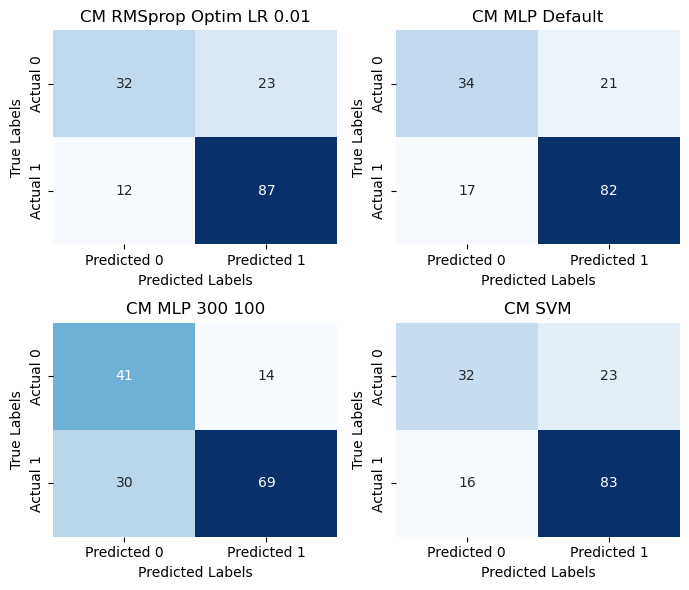

In [61]:
cm_14 = confusion_matrix(y_test_tensor.numpy(), mlp.predict(X_test_tensor.numpy()))  # MLP default
cm_15 = confusion_matrix(y_test_tensor.numpy(), mlp_300_100.predict(X_test_tensor.numpy()))  # Nadam Optim LR 0.01
cm_16 = confusion_matrix(y_test_tensor.numpy(), svm_model.predict(X_test_tensor.numpy()))  # Nadam Optim LR 0.01

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(7, 6))  # Adjust size as needed

# List of confusion matrices and titles
cms = [cm_11, cm_14, cm_15, cm_16]
titles = [
    'CM RMSprop Optim LR 0.01',
    'CM MLP Default',
    'CM MLP 300 100',
    'CM SVM'
]

# Loop through the confusion matrices and their respective titles
for i, (cm, title) in enumerate(zip(cms, titles)):
    row, col = divmod(i, 2)  # Determine the row and column for the subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                ax=axes[row, col],
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    axes[row, col].set_xlabel('Predicted Labels')
    axes[row, col].set_ylabel('True Labels')
    axes[row, col].set_title(title)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [62]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
print(f'Precision Sign without bias LR 0.1 : {precision_score(y_test,predictions_sign_without_bias_lr_0_1):.3f}') # Perceptron Sign Without Bias LR 0.1
print(f'Precision Sign without bias LR 0.1 : {precision_score(y_test,predictions_sign_with_bias_lr_0_1):.3f}') # Perceptron Sign With Bias LR 0.1
print(f'Precision Sign without bias LR 0.1 : {precision_score(y_test,predictions_sign_without_bias_lr_0_0_1):.3f}') # Perceptron Sign Without Bias LR 0.01
print(f'Precision Sign without bias LR 0.1 : {precision_score(y_test,predictions_sign_with_bias_lr_0_0_1):.3f}') # Perceptron Sign With Bias LR 0.01
print(f'Precision Sign without bias LR 0.1 : {precision_score((y_test+1)/2,perceptron_sklearn.predict(X_test_tensor.numpy())):.3f}')  #  Perceptron sklearn
print(f'Precision SGD Optim LR 0.1 : {precision_score(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_1.numpy()):.3f}')  # SGD Optim LR 0.1
print(f'Precision SGD Optim LR 0.01 : {precision_score(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_0_1.numpy()):.3f}')  # SGD Optim LR 0.01
print(f'Precision Adam Optim LR 0.1 : {precision_score(y_test_tensor.numpy(), predicted_labels_adam_lr_0_1.numpy()):.3f}')  # Adam Optim LR 0.1
print(f'Precision Adam Optim LR 0.01 : {precision_score(y_test_tensor.numpy(), predicted_labels_adam_lr_0_0_1.numpy()):.3f}')  # Adam Optim LR 0.01
print(f'Precision RMSprop Optim LR 0.1 : {precision_score(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_1.numpy()):.3f}')  # RMSprop Optim LR 0.1
print(f'Precision RMSprop Optim LR 0.01 : {precision_score(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_0_1.numpy()):.3f}')  # RMSprop Optim LR 0.01
print(f'Precision Nadam Optim LR 0.1 : {precision_score(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_1.numpy()):.3f}')  # Nadam Optim LR 0.1
print(f'Precision Nadam Optim LR 0.01: {precision_score(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_0_1.numpy()):.3f}')  # Nadam Optim LR 0.01

Precision Sign without bias LR 0.1 : 0.777
Precision Sign without bias LR 0.1 : 0.805
Precision Sign without bias LR 0.1 : 0.785
Precision Sign without bias LR 0.1 : 0.722
Precision Sign without bias LR 0.1 : 0.897
Precision SGD Optim LR 0.1 : 0.748
Precision SGD Optim LR 0.01 : 0.643
Precision Adam Optim LR 0.1 : 0.796
Precision Adam Optim LR 0.01 : 0.754
Precision RMSprop Optim LR 0.1 : 0.812
Precision RMSprop Optim LR 0.01 : 0.791
Precision Nadam Optim LR 0.1 : 0.800
Precision Nadam Optim LR 0.01: 0.756


In [63]:
print(f'Recall Sign without bias LR 0.1 : {recall_score(y_test,predictions_sign_without_bias_lr_0_1):.3f}') # Perceptron Sign Without Bias LR 0.1
print(f'Recall Sign without bias LR 0.1 : {recall_score(y_test,predictions_sign_with_bias_lr_0_1):.3f}') # Perceptron Sign With Bias LR 0.1
print(f'Recall Sign without bias LR 0.1 : {recall_score(y_test,predictions_sign_without_bias_lr_0_0_1):.3f}') # Perceptron Sign Without Bias LR 0.01
print(f'Recall Sign without bias LR 0.1 : {recall_score(y_test,predictions_sign_with_bias_lr_0_0_1):.3f}') # Perceptron Sign With Bias LR 0.01
print(f'Recall Sign without bias LR 0.1 : {recall_score((y_test+1)/2,perceptron_sklearn.predict(X_test_tensor.numpy())):.3f}')  #  Perceptron sklearn
print(f'Recall SGD Optim LR 0.1 : {recall_score(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_1.numpy()):.3f}')  # SGD Optim LR 0.1
print(f'Recall SGD Optim LR 0.01 : {recall_score(y_test_tensor.numpy(), predicted_labels_sgd_lr_0_0_1.numpy()):.3f}')  # SGD Optim LR 0.01
print(f'Recall Adam Optim LR 0.1 : {recall_score(y_test_tensor.numpy(), predicted_labels_adam_lr_0_1.numpy()):.3f}')  # Adam Optim LR 0.1
print(f'Recall Adam Optim LR 0.01 : {recall_score(y_test_tensor.numpy(), predicted_labels_adam_lr_0_0_1.numpy()):.3f}')  # Adam Optim LR 0.01
print(f'Recall RMSprop Optim LR 0.1 : {recall_score(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_1.numpy()):.3f}')  # RMSprop Optim LR 0.1
print(f'Recall RMSprop Optim LR 0.01 : {recall_score(y_test_tensor.numpy(), predicted_labels_rmsprop_lr_0_0_1.numpy()):.3f}')  # RMSprop Optim LR 0.01
print(f'Recall Nadam Optim LR 0.1 : {recall_score(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_1.numpy()):.3f}')  # Nadam Optim LR 0.1
print(f'Recall Nadam Optim LR 0.01: {recall_score(y_test_tensor.numpy(), predicted_labels_nadam_lr_0_0_1.numpy()):.3f}')  # Nadam Optim LR 0.01

Recall Sign without bias LR 0.1 : 0.808
Recall Sign without bias LR 0.1 : 0.707
Recall Sign without bias LR 0.1 : 0.737
Recall Sign without bias LR 0.1 : 0.788
Recall Sign without bias LR 0.1 : 0.525
Recall SGD Optim LR 0.1 : 0.899
Recall SGD Optim LR 0.01 : 1.000
Recall Adam Optim LR 0.1 : 0.747
Recall Adam Optim LR 0.01 : 0.899
Recall RMSprop Optim LR 0.1 : 0.828
Recall RMSprop Optim LR 0.01 : 0.879
Recall Nadam Optim LR 0.1 : 0.768
Recall Nadam Optim LR 0.01: 0.909


In [64]:
print(f'Precision MLP Default : {precision_score(y_test_tensor.numpy(),mlp.predict(X_test_tensor.numpy())):.3f}')  # MLP default
print(f'Precision MLP 300 100 : {precision_score(y_test_tensor.numpy(), mlp_300_100.predict(X_test_tensor.numpy())):.3f}')  # MLP 300 100
print(f'Precision SVM : {precision_score(y_test_tensor.numpy(), svm_model.predict(X_test_tensor.numpy())):.3f}')  # SVM

Precision MLP Default : 0.796
Precision MLP 300 100 : 0.831
Precision SVM : 0.783


In [65]:
print(f'Recall  MLP Default : {recall_score(y_test_tensor.numpy(),mlp.predict(X_test_tensor.numpy())):.3f}')  # MLP default
print(f'Recall MLP 300 100 : {recall_score(y_test_tensor.numpy(), mlp_300_100.predict(X_test_tensor.numpy())):.3f}')  # MLP 300 100
print(f'Recall SVM : {recall_score(y_test_tensor.numpy(), svm_model.predict(X_test_tensor.numpy())):.3f}')  # SVM

Recall  MLP Default : 0.828
Recall MLP 300 100 : 0.697
Recall SVM : 0.838
